<a href="https://colab.research.google.com/github/DarkSteelD/ColabSpace/blob/main/Lab2_neuron_activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Нейрон-с-различными-функциями-активации" data-toc-modified-id="Нейрон-с-различными-функциями-активации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>Нейрон с различными функциями активации</b></a></span></li><li><span><a href="#Нейрон-с-ReLU-(Recitified-Linear-Unit)" data-toc-modified-id="Нейрон-с-ReLU-(Recitified-Linear-Unit)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><b>Нейрон с ReLU (Recitified Linear Unit)</b></a></span><ul class="toc-item"><li><span><a href="#Тестирование-нейрона-с-ReLU" data-toc-modified-id="Тестирование-нейрона-с-ReLU-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><b>Тестирование нейрона с ReLU</b></a></span></li></ul></li><li><span><a href="#Нейрон-с-LeakyReLU-(Leaky-Recitified-Linear-Unit)" data-toc-modified-id="Нейрон-с-LeakyReLU-(Leaky-Recitified-Linear-Unit)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><b>Нейрон с LeakyReLU (Leaky Recitified Linear Unit)</b></a></span><ul class="toc-item"><li><span><a href="#Тестирование-нейрона-с-LeakyReLU" data-toc-modified-id="Тестирование-нейрона-с-LeakyReLU-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><b>Тестирование нейрона с LeakyReLU</b></a></span></li></ul></li><li><span><a href="#Нейрон-с-ELU-(Exponential-Linear-Unit)" data-toc-modified-id="Нейрон-с-ELU-(Exponential-Linear-Unit)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><b>Нейрон с ELU (Exponential Linear Unit)</b></a></span><ul class="toc-item"><li><span><a href="#Полезные-ссылки" data-toc-modified-id="Полезные-ссылки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><b>Полезные ссылки</b></a></span></li></ul></li></ul></div>

---

<h2 style="text-align: center;"><b>Задание 1</b></h2>

<h2 style="text-align: center;"><b>Нейрон с различными функциями активации</b></h2>

---

**Какую функции активации стоит выбирать в экспериментах (и в "реальной жизни")?** В этом ноутбуке Вам предлагается самим дойти до истины и сравнить нейроны с различными функциями активации (их качество на двух выборках). Не забудьте убедиться, что все эксперименты с разными видами нейронов Вы проводите в одинаковых условиях (иначе ведь эксперимент будет нечестным).

В данном задании Вам нужно будет:
- самостоятельно реализовать класс **`Neuron()`** с различными функциями активации (ReLU, LeakyReLU и ELU)

- обучить и протестировать этот класс на сгенерированных и реальных данных

In [77]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [78]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

---

В данном случае мы решаем задачу бинарной классификации (2 класса: 1 или 0). Для простоты в качестве функции потерь возьмём квадратичную функцию потерь, хоть она и плохо показывает себя в задаче классификации.

$$
Loss(\hat{y}, y) = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2
$$  

Здесь $w \cdot X_i$ - скалярное произведение, а $\hat{y_i} = \sigma(w \cdot X_i) =\frac{1}{1+e^{-w \cdot X_i}} $ - сигмоида ($i$ -- номер объекта в выборке).

In [79]:
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)

Далее будут предложены несколько функций активации, и Вам нужно реализовать класс `Neuron`

<h2 style="text-align: center;"><b>Нейрон с ReLU (Recitified Linear Unit)</b></h2>  

ReLU самая часто используемая (по крайней мере, пару лет назад) функция активации в нейронных сетях. Выглядит она очень просто:

\begin{equation*}
ReLU(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Или по-другому:

$$
ReLU(x) = \max(0, x)
$$

В (свободном) переводе Rectified Linear Unit = "Усечённая линейная функция". Собственно, мы по сути просто не даём проходить отрицательным числам.

Производная здесь берётся как производная от кусочно-заданной функции, то есть на участках, где функция гладкая, и в нуле её доопредляют нулём:

\begin{equation*}
ReLU'(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

График этой функции и её производной выглядят так:

<img src="https://upload-images.jianshu.io/upload_images/1828517-0828da0d1164c024.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240" width=800, height=300>

Подставим ReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ReLU(w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
    y_i^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

(помните, что $w \cdot X_i$ -- это число в данном случае (результат скалярного произведения двух векторов)).

Тогда формула для обновления весов при градиентном спуске будет такая (в матричном виде, рекмендуем вывести самим то, как это получается из формулы для одного объекта):

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}
 \begin{cases}
   0, &{w \cdot X_i \le 0}\\
   \frac{1}{n} X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

(напоминаем, что здесь $w \cdot X$ -- матричное произведение вектора $w$ (ведь вектор -- тоже матрица, не так ли?) и матрицы $X$ )

Почему в первом случае будет 0? Потому что в формулу $y_i^2$ не входят веса , а мы берём производную именно по весам $w$.

* Реализуйте ReLU и её производную:

In [80]:
def relu(x):
    """ReLU-функция"""
    return np.maximum(0, x)

In [81]:
def relu_derivative(x):
    """Производная ReLU"""
    return (x > 0).astype(float)


Теперь нужно написать нейрон с ReLU. Здесь всё очень похоже на перцептрон, но по-другому обновляются веса и другая функция активации:

In [82]:
class NeuronReLU:
    def __init__(self, w=None, b=0):
        self.w = w
        self.b = b

    def activate(self, x):
        return relu(x)

    def forward_pass(self, X):
        linear_output = X.dot(self.w) + self.b
        activated_output = self.activate(linear_output)
        return activated_output

    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = len(y)
        error = y_pred - y
        linear_output = X.dot(self.w) + self.b
        relu_grad = relu_derivative(linear_output)
        gradients = X.T.dot(error * relu_grad) / n
        bias_gradient = np.sum(error * relu_grad) / n
        self.w -= learning_rate * gradients
        self.b -= learning_rate * bias_gradient

    def loss(self, y_pred, y):
        return 0.5 * np.mean((y_pred - y) ** 2)

    def fit(self, X, y, num_epochs=300, learning_rate=0.005):
        np.random.seed(42)  # For reproducibility
        self.w = np.random.randn(X.shape[1], 1) * 0.01  # Small random values
        self.b = 0

        if isinstance(y, pd.Series):
            y = y.to_numpy().reshape(-1, 1)
        else:
            y = y.reshape(-1, 1)

        Loss_values = []

        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            Loss_values.append(self.loss(y_pred, y))
            self.backward_pass(X, y, y_pred, learning_rate)

        return Loss_values


<h3 style="text-align: center;"><b>Тестирование нейрона с ReLU</b></h3>  

Здесь Вам нужно самим протестировать новый нейрон **на данных** ("Яблоки и Груши").
В итоге нужно вывести:
* график, на котором будет показано, как изменяется функция потерь $Loss$ в зависимости от числа итераций обучения
* график с раскраской выборки нейроном

***ПРИМЕЧАНИЕ***: пожалуйста, почаще проверяйте `.shape` у матриц и векторов: `self.w`, `X` и `y` внутри класса. Очень часто ошибка решается транспонированием или `.reshape()`'ом. Не забывайте проверять, что на что Вы умножаете и какой вектор (какой размер) хотите получить на выходе -- это очень помогает не запутаться.

** Проверка forward_pass()**

In [83]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = NeuronReLU(w, b)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[ 9.]
 [12.]
 [ 0.]]


*Hint: "**-0.**" -- это просто ноль*

**Проверка backward_pass()**

In [84]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [85]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

w = [[0.94666667]
 [1.88      ]]
b = 1.9666666666666666


"Яблоки и Груши" (необходимо положить данные в папку `./data`):

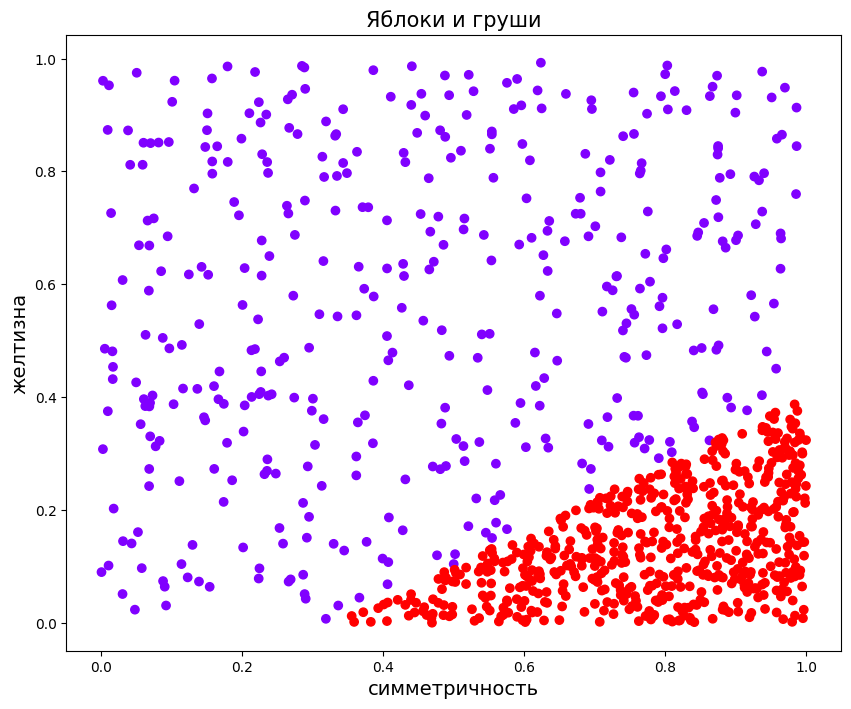

In [86]:
data = pd.read_csv("/content/sample_data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [87]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

Выведите лосс при обучении нейрона с ReLU на этом датасете:

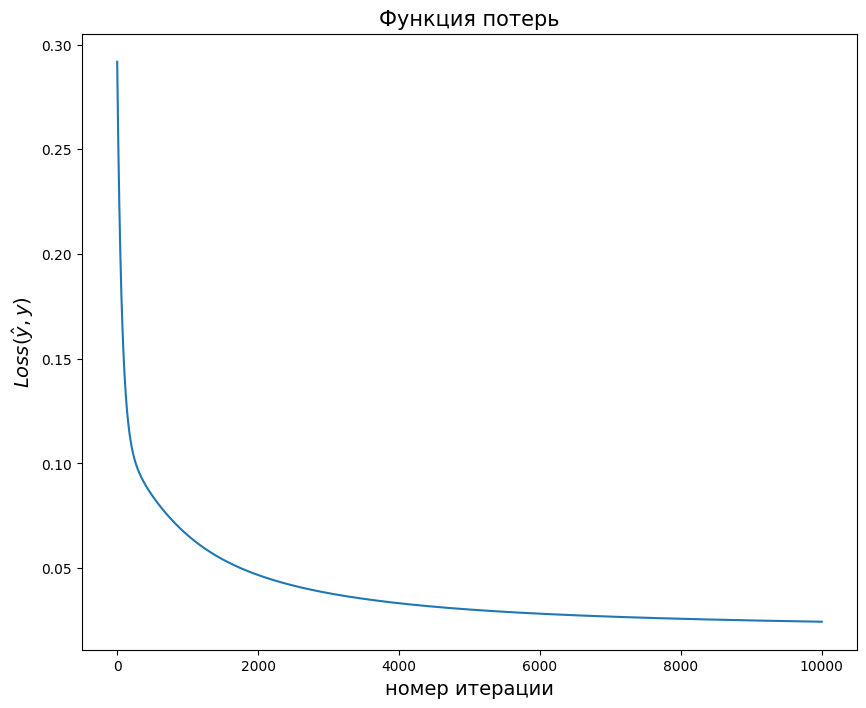

CPU times: user 598 ms, sys: 232 ms, total: 829 ms
Wall time: 560 ms


In [88]:
%%time

neuron = NeuronReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Скорее всего сейчас у вас лосс -- это прямая линия, и вы видите, что веса не обновляются. Но почему?

Всё просто -- если присмотреться, то видно, что self.w и self.b иницилизируются нулями в начале `.fit()`-метода. Если расписать, как будет идти обновление, то видно, что из-за ReLU веса просто-напросто не будут обновляться, если начать с инициализации нулями.

Это -- одна из причин, по которой в нейронных сетях веса инициализируют случаными числами (обычно из отрезка [0, 1)).

Обучим нейрон, инициализировав случайно веса (поставьте 10000 итераций).

**!!! Закомментируйте инициализацию нулями в функции `.fit()` класса `NeuronReLU` !!!**

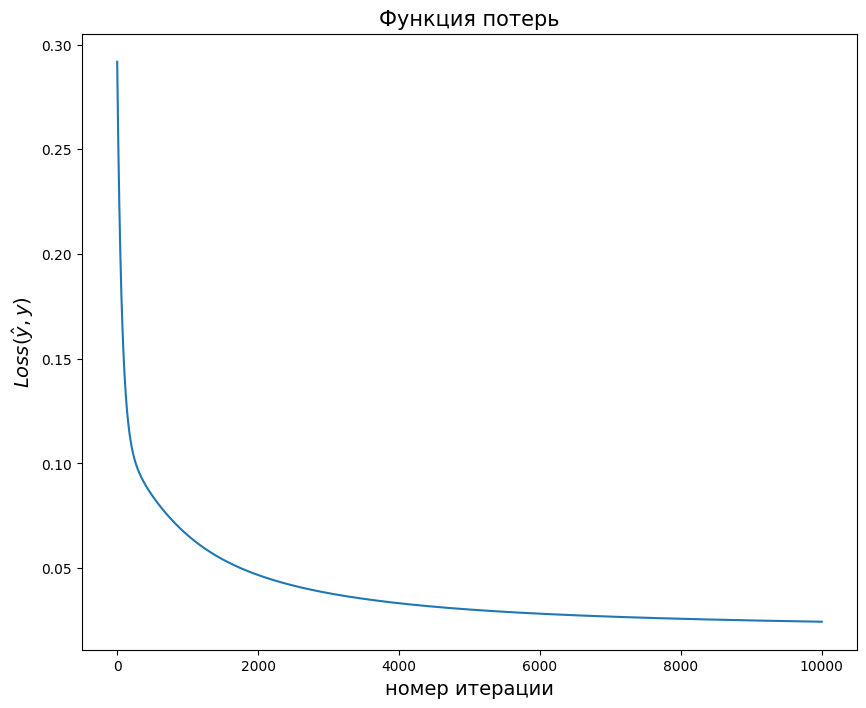

CPU times: user 586 ms, sys: 237 ms, total: 823 ms
Wall time: 552 ms


In [89]:
%%time

neuron = NeuronReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Посмотрим, как предсказывает этот нейрон:

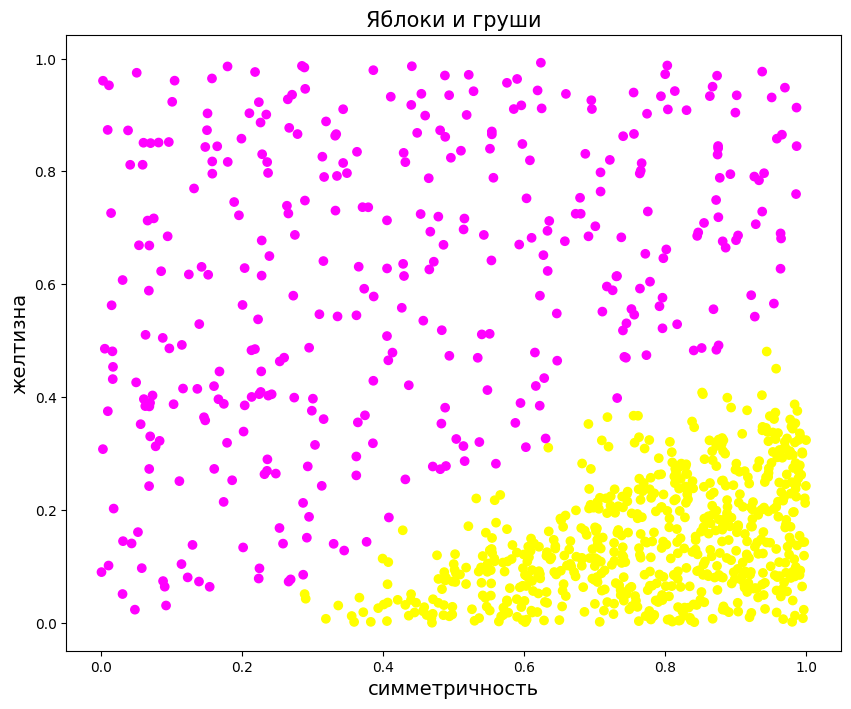

In [90]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

<img src="https://alumni.lscollege.ac.uk/files/2015/12/Interview-questions-square-image.jpg" width=400 height=300>

Есть одна тенденция: пороговая функция активации и сигмоида (обычно всё же только сигмоида) чаще используются именно на **выходном слое** нейросети в задаче классификации -- ими предсказывают вероятности объектов принадлежать одному из классов, в то время как продвинутые функции активации (ReLU и те, что будут дальше) используются внутри нейросети, то есть в **скрытых слоях**.

Нужно понимать, что ReLU не может вернуть отрицательные числа.

**Плюсы ReLU:**

* дифференцируемая (с доопределе
нием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде

**Возможные минусы ReLU:**

* не центрирована около 0 (может мешать скорости сходимсти)
* зануляет все отрицательные входы, тем самым веса у занулённых нейронов могут часто *не обновляться*, эту проблему иногда называют *мёртвые нейроны*

С последней проблемой можно побороться, а именно:

<h2 style="text-align: center;"><b>Нейрон с LeakyReLU (Leaky Recitified Linear Unit)</b></h2>  

LeakyReLU очень слабо отличается от ReLU, но часто помогает сети обучаться быстрее, поскольку нет проблемы "мёртвых нейронов":

\begin{equation*}
LeakyReLU(x) =
 \begin{cases}
   \alpha x, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

где $\alpha$ -- маленькое число от 0 до 1.

Производная здесь берётся так же, но вместо нуля будет $\alpha$:

\begin{equation*}
LeakyReLU'(x) =
 \begin{cases}
   \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

График этой функции:

<img src="https://cdn-images-1.medium.com/max/1600/0*UtLlZJ80TMIM7kXk." width=400 height=300>

Подставим LeakyReLu в Loss:

$$
Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (LeakyReLU(w \cdot X_i) - y_i)^2 =
\begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
   (\alpha \cdot w \cdot X_i - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}
$$  

Формула для обновления весов при градиентном спуске:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}
 \begin{cases}
   \alpha X_i^T (w \cdot X_i - y), &{w \cdot X_i \le 0}\\
    X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* Реализуйте LeakyReLU и её производную:

In [91]:
def leaky_relu(x, alpha=0.01):
    """LeakyReLU-функция"""
    return np.where(x > 0, x, alpha * x)

In [92]:
def leaky_relu_derivative(x, alpha=0.01):
    """Производная LeakyReLU"""
    return np.where(x > 0, 1, alpha )

Теперь нужно написать нейрон с LeakyReLU функцией активации. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [93]:
class NeuronLeakyReLU:
    def __init__(self, w=None, b=0, alpha=0.01):
        self.w = np.array(w) if w is not None else None
        self.b = b
        self.alpha = alpha

    def activate(self, x):
        return leaky_relu(x, self.alpha)

    def forward_pass(self, X):
        if self.w is None:
            self.w = np.zeros((X.shape[1], 1))
            self.b = 0
        linear_output = X.dot(self.w) + self.b
        return self.activate(linear_output).reshape(-1, 1)

    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = len(y)
        error = y_pred - y
        linear_output = X.dot(self.w) + self.b
        leaky_relu_grad = leaky_relu_derivative(linear_output, self.alpha)
        gradients = X.T.dot(error * leaky_relu_grad) / n
        bias_gradient = np.sum(error * leaky_relu_grad) / n
        self.w -= learning_rate * gradients
        self.b -= learning_rate * bias_gradient

    def fit(self, X, y, num_epochs=300):
        if isinstance(y, pd.Series):
            y = y.to_numpy().reshape(-1, 1)
        else:
            y = y.reshape(-1, 1)
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0

        Loss_values = []
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            loss = np.mean((y_pred - y) ** 2)
            Loss_values.append(loss)
            self.backward_pass(X, y, y_pred)
        return Loss_values

<h3 style="text-align: center;"><b>Тестирование нейрона с LeakyReLU</b></h3>  

"Яблоки и Груши":

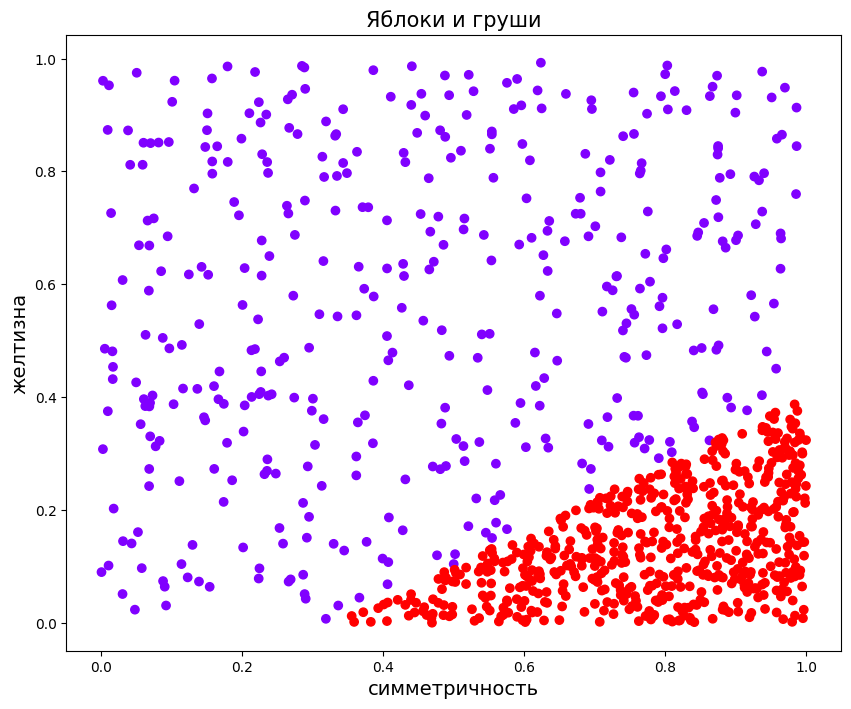

In [94]:
data = pd.read_csv("/content/sample_data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [95]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

Обучим нейрон, инициализировав случайно веса (поставьте 10000 итераций).

**!!! Закомментируйте инициализацию нулями в функции `.fit()` класса `NeuronLeakyReLU` !!!**

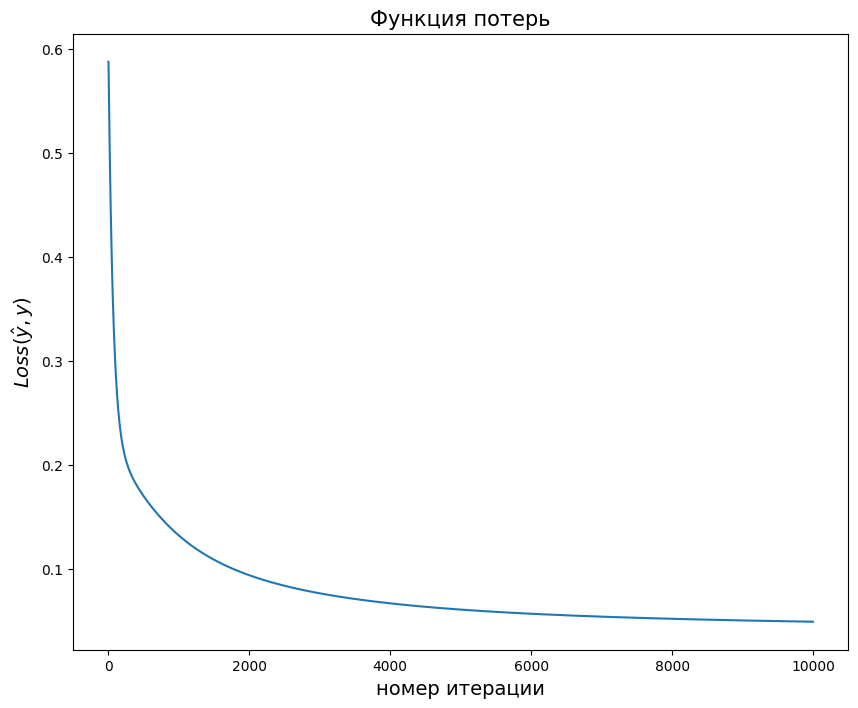

CPU times: user 686 ms, sys: 233 ms, total: 920 ms
Wall time: 648 ms


In [96]:
%%time

neuron = NeuronLeakyReLU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Посмотрим, как предсказывает этот нейрон:

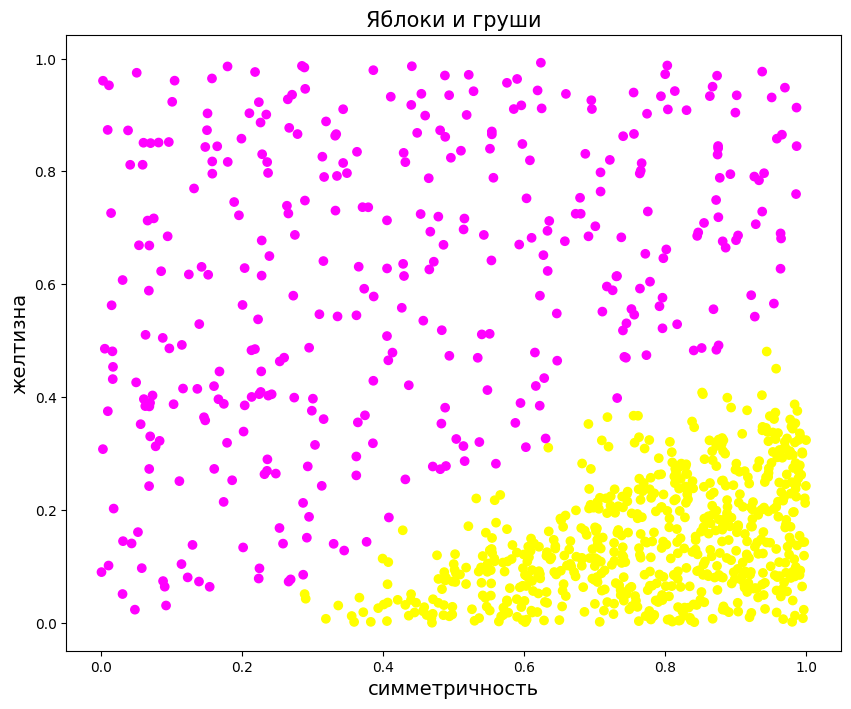

In [97]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Плюсы LeakyReLU:**

* дифференцируемая (с доопределнием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде
* нет проблемы "мёртвых нейронов", как в ReLU

**Возможные минусы LeakyReLU:**

* не центрирована около 0 (может мешать скорости сходимсти)
* немного не устойчива к "шуму" (см. лекции Стэнфорда)

<h2 style="text-align: center;"><b>Нейрон с ELU (Exponential Linear Unit)</a></b></h2>  

ELU -- не так давно предложенная (в 2015 году) функция активации, которая, как говорят авторы статьи, лучше LeakyReLU. Вот формула ELU:

\begin{equation*}
ELU(\alpha, x) =
 \begin{cases}
   \alpha (e^x - 1), &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

где $\alpha$ -- маленькое число от 0 до 1.

Производная здесь берётся так же, но вместо нуля будет $\alpha$:

\begin{equation*}
ELU'(x) =
 \begin{cases}
   ELU(\alpha, x) + \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Здесь в производной использован постой трюк -- сделано $- \alpha + \alpha$, чтобы вычислять было проще.

График этой функции:

<img src="http://p0.ifengimg.com/pmop/2017/0907/A004001DD141881BFD8AD62E5D31028C3BE3FAD1_size14_w446_h354.png" width=500 height=400>

Подставим LeakyReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ELU(\alpha, w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
   (\alpha (e^{w \cdot X_i} - 1) - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

Здесь вам нужно выписать самим град спуск для весов. Брать производную "в лоб" некрасиво и неудобно. Нужно воспользоваться **правилом цепочки**, оно же **правило взятия производной сложной функции**:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}
 \begin{cases}
   , &{w \cdot X_i \le 0}\\
   , &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* Реализуйте ELU и её производную:

In [98]:
def elu(x, alpha=0.01):
    """LeakyReLU-функция"""
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

In [99]:
def elu_derivative(x, alpha=0.01):
    """Производная LeakyReLU"""
    return np.where(x > 0, 1, alpha * np.exp(x))

Теперь нужно написать нейрон с LeakyReLU функцией активации. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [100]:
class NeuronELU:
    def __init__(self, w=None, b=0, alpha=0.01):
        self.w = w
        self.b = b
        self.alpha = alpha

    def activate(self, x):
        return elu(x, self.alpha)

    def activate_derivative(self, x):
        return elu_derivative(x, self.alpha)

    def forward_pass(self, X):
        linear_output = X.dot(self.w) + self.b
        return self.activate(linear_output).reshape(-1, 1)

    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        n = X.shape[0]
        errors = y_pred - y
        linear_output = X.dot(self.w) + self.b
        derror = errors * self.activate_derivative(linear_output)
        gradients = X.T.dot(derror) / n
        bias_gradient = np.sum(derror) / n
        self.w -= learning_rate * gradients
        self.b -= learning_rate * bias_gradient

    def fit(self, X, y, num_epochs=300, learning_rate=0.005):
        self.w = np.zeros((X.shape[1], 1))  # Инициализация весов
        self.b = 0  # Инициализация смещения
        Loss_values = []  # Вектор значений функции потерь
        if isinstance(y, pd.Series):
            y = y.to_numpy().reshape(-1, 1)
        else:
            y = y.reshape(-1, 1)

        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            loss = np.mean((y_pred - y) ** 2)
            Loss_values.append(loss)
            self.backward_pass(X, y, y_pred, learning_rate)

        return Loss_values

"Яблоки и Груши":

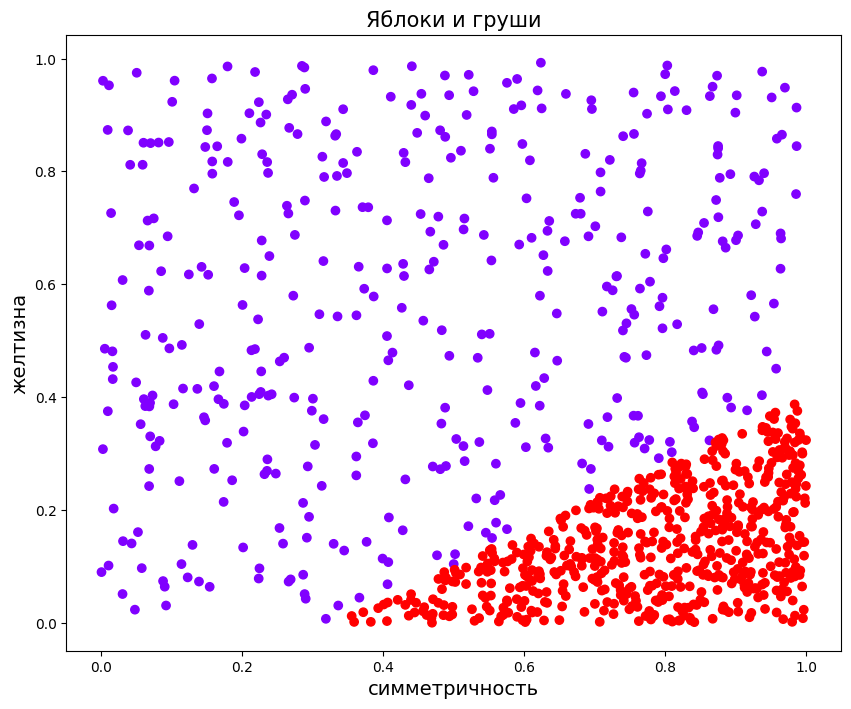

In [101]:
data = pd.read_csv("/content/sample_data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [102]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

Обучим нейрон, инициализировав случайно веса (поставьте 10000 итераций):

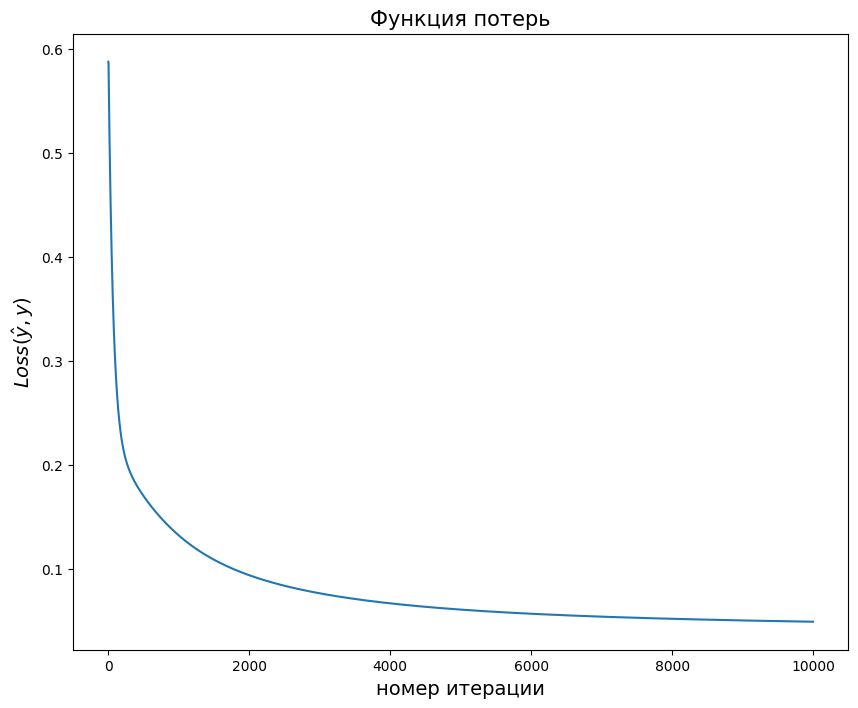

CPU times: user 794 ms, sys: 234 ms, total: 1.03 s
Wall time: 756 ms


In [103]:
%%time

neuron = NeuronELU(w=np.random.rand(X.shape[1], 1), b=np.random.rand(1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Посмотрим, как предсказывает этот нейрон:

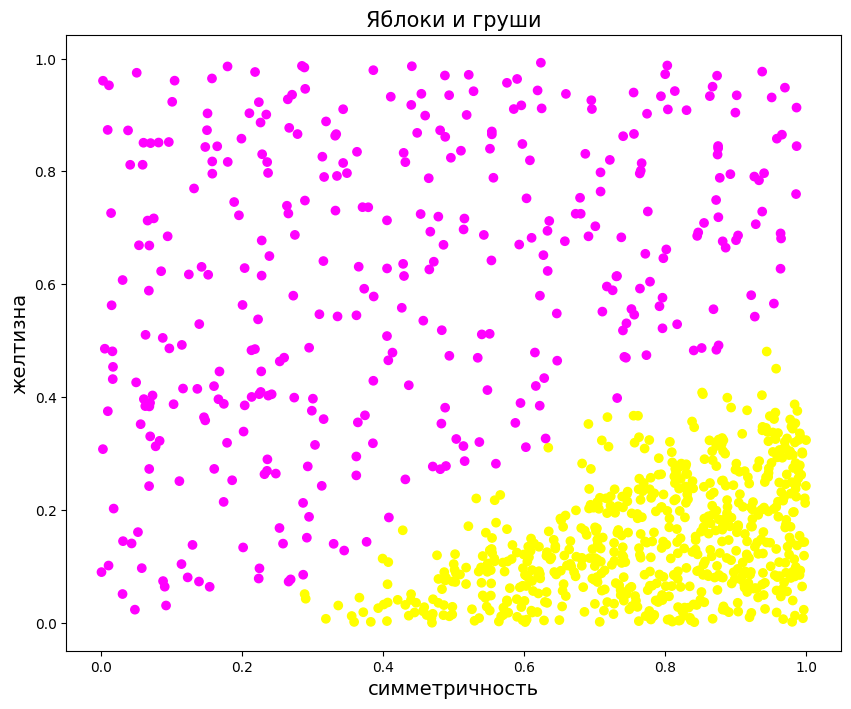

In [104]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Плюсы ELU:**

* дифференцируемая (с доопределнием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде
* нет проблемы "мёртвых нейронов", как в ReLU
* более устойчива к "шуму" (см. лекции Стэнфорда)

**Возможные минусы ELU:**

* не очень хорошо центрирована около 0 (может мешать скорости сходимсти)
* вычислительно дольше, чем ReLU и LeakyReLU

---

И напоследок -- почти все функции активации:

<img src="http://cdn-images-1.medium.com/max/1600/1*DRKBmIlr7JowhSbqL6wngg.png">

Не хватает `SeLU()` и `Swish()`. Про них можно прочитать здесь: [SeLU](https://arxiv.org/pdf/1706.02515.pdf), [Swish](https://arxiv.org/pdf/1710.05941.pdf).

`Tanh()` (тангенс гиперболический) используется редко, а `Maxout()` мы решили не рассматривать (так как, опять же, нами не было замечено, что он часто используется, однако про него ходят хорошие слухи).  

---

За функцию активации можно взять вообще почти любую функцию (которая, как вы полагаете, будет помогать обучению). Ещё больше функций активации вы можете [найти на википедии](https://en.wikipedia.org/wiki/Activation_function).

<h2 style="text-align: center;"><b>Задание 2</b></h2>

Сравните качество работы Вашего перцептрона из Лабораторной 2 и алгоритма из библиотеки sklearn на датасете с сайта Kaggle - Gender Recognition by Voice. (Код можно взять из файла Introducing_Scikit_Learn).

In [105]:
import pandas as pd
data = pd.read_csv('/content/sample_data/voice.csv')
print(data.head())


   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [106]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Кодируем метки целевой переменной
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
# Разделите данные на признаки и целевую переменную
X = data.drop('label', axis=1)
y = data['label']
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(y_train)

807     1
2495    0
2529    0
2241    0
2981    0
       ..
3092    0
1095    1
1130    1
1294    1
860     1
Name: label, Length: 2534, dtype: int64


In [108]:
my_NeuronReLU = NeuronReLU()
my_NeuronReLU.fit(X_train, y_train)


[0.23918812751499774,
 0.23765730221162115,
 0.23574587781698136,
 0.23343147451472593,
 0.23089338477954133,
 0.2282549419028253,
 0.2256333280840743,
 0.22302854350041743,
 0.22045622391139205,
 0.21789781330945726,
 0.21539136329713784,
 0.21292893467340201,
 0.21054101238595288,
 0.2082283726298875,
 0.20598912494023738,
 0.20382410925398226,
 0.2017306872893575,
 0.19968999757377756,
 0.19772234935966376,
 0.1958297530618297,
 0.194008886997916,
 0.19225180883052864,
 0.19055177481181504,
 0.18891285963450524,
 0.18733292847823402,
 0.1858054448356622,
 0.18433135574796314,
 0.18291224472242568,
 0.18154294591003453,
 0.18022081695558562,
 0.17894240796177763,
 0.17770523244908432,
 0.17650529754605854,
 0.17534293125692224,
 0.17421774213025656,
 0.1731249150106542,
 0.17206291931822107,
 0.17103117523030295,
 0.17002956849777728,
 0.16905533289051047,
 0.16810573287109004,
 0.1671792416909766,
 0.16627176824258263,
 0.16538054339291877,
 0.16450479999609374,
 0.16364028170397982

In [109]:
my_NeuronLeakyReLU = NeuronLeakyReLU()
my_NeuronLeakyReLU.fit(X_train, y_train)

[0.4921073401736385,
 0.49202264558487224,
 0.4834125577184545,
 0.4750596810241728,
 0.4670295805665292,
 0.4593259050279681,
 0.4519407703023817,
 0.4448608636629983,
 0.4380725089322518,
 0.4315611796143756,
 0.42531285969541005,
 0.41931427535117854,
 0.4135524573472473,
 0.4080149357147073,
 0.40269037788705886,
 0.39756810431965717,
 0.39263559232136364,
 0.38788496933954825,
 0.3833061164893128,
 0.37888995382683105,
 0.37462712515602636,
 0.37050697454989356,
 0.3665212797766939,
 0.3626643333513613,
 0.358930085057458,
 0.355307699890393,
 0.35179572934663716,
 0.3483853228988699,
 0.34506632915804536,
 0.34183365282365286,
 0.3386881959268,
 0.33562083113922986,
 0.3326319495618306,
 0.3297188131622951,
 0.32686614927702895,
 0.3240580769060248,
 0.32130399751195404,
 0.3185980462695059,
 0.3159406523283992,
 0.3133210082045785,
 0.31073244395688243,
 0.3081851673997975,
 0.30567275520416654,
 0.3031982257417459,
 0.3007591271716312,
 0.2983550863758376,
 0.29597011695486297,

In [110]:
my_NeuronELU = NeuronELU()
my_NeuronELU.fit(X_train, y_train)

[0.4921073401736385,
 0.4920226455846062,
 0.48341255244056436,
 0.47505964329885414,
 0.4670294786852684,
 0.4593257095578291,
 0.45194045569715796,
 0.44486040969958074,
 0.43807190021711306,
 0.43156040457478556,
 0.42531191036116367,
 0.4193131469281283,
 0.4135511526350782,
 0.4080134547515752,
 0.40268872169201053,
 0.39756629029125923,
 0.392633617153902,
 0.38788284898927794,
 0.3833038554588916,
 0.3788881105003465,
 0.37462531269043836,
 0.37050521066652164,
 0.36651955048133256,
 0.36266261508704367,
 0.35892846973155795,
 0.3553061095642973,
 0.3517942199627436,
 0.3483839374669529,
 0.3450650902435947,
 0.3418324918193683,
 0.33868717797886894,
 0.33561990952908993,
 0.3326311023236071,
 0.3297181367178512,
 0.3268657853729523,
 0.324059175582416,
 0.32130545178848074,
 0.318599746528654,
 0.3159426977232259,
 0.3133234447987725,
 0.3107351330558772,
 0.30818813420488217,
 0.30567595320677876,
 0.30320166460179093,
 0.30076275345896686,
 0.2983589998559013,
 0.295974383774

In [111]:
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)


Perceptron()

In [112]:
from sklearn.metrics import accuracy_score


y_pred_custom = (my_NeuronELU.forward_pass(X_test) > 0.5).astype(int)
custom_accuracy1 = accuracy_score(y_test, y_pred_custom)

y_pred_custom = (my_NeuronLeakyReLU.forward_pass(X_test)  > 0.5).astype(int)
custom_accuracy2 = accuracy_score(y_test, y_pred_custom)

y_pred_custom = (my_NeuronReLU.forward_pass(X_test)  > 0.5).astype(int)
custom_accuracy3 = accuracy_score(y_test, y_pred_custom)

y_pred_sklearn = sk_perceptron.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

print(f"Accuracy of ELU: {custom_accuracy1}")
print(f"Accuracy of LeakyReLU: {custom_accuracy2}")
print(f"Accuracy of ReLU: {custom_accuracy3}")
print(f"Accuracy of sklearn perceptron: {sklearn_accuracy}")


Accuracy of ELU: 0.9463722397476341
Accuracy of LeakyReLU: 0.9463722397476341
Accuracy of ReLU: 0.9305993690851735
Accuracy of sklearn perceptron: 0.9605678233438486


<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

0). Статья от Стэнфорда: http://cs231n.github.io/neural-networks-1/

1). Хорошая статья про функции активации: https://www.jeremyjordan.me/neural-networks-activation-functions/

2). [Видео от Siraj Raval](https://www.youtube.com/watch?v=-7scQpLossT7uo)

3). Современная статья про функции активации. Теперь на хайпе активация $swish(x) = x\sigma (\beta x)$: https://arxiv.org/pdf/1710.05941.pdf (кстати, при её поиске в некоторой степени использовался neural architecture search)

4). SeLU имеет очень интересные, доказанные с помощью теории вероятностей свойства: https://arxiv.org/pdf/1706.02515.pdf (да, в этой статье 102 страницы)

5). [Список функций активации из википедии](https://en.wikipedia.org/wiki/Activation_function)